In [1]:
# Check Python Version
!python --version

Python 3.10.12


In [2]:
# Check Ubuntu Version
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [3]:
# Check CUDA/cuDNN Version
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
/usr/local/cuda/bin/nvcc


In [4]:
# Check GPU
!nvidia-smi

Thu May  9 20:39:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 1.91 MiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 890.7 kB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 641.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 

In [6]:
import cudf
import cuml
import os
import numpy as np
import pandas as pd

In [7]:
from cuml.datasets import make_regression
from cuml.model_selection import train_test_split
from cuml.linear_model import LinearRegression as cuLR
from sklearn.metrics import r2_score

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv('/content/bitstampUSD_1-min_data_2012-01-01_to_2018-03-27.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.00,4.39
...,...,...,...,...,...,...,...,...
520929,1356573660,13.25,13.25,13.25,13.25,0.013585,0.18,13.25
520930,1356573720,13.25,13.25,13.25,13.25,0.013585,0.18,13.25
520931,1356573780,13.25,13.25,13.25,13.25,0.013585,0.18,13.25
520932,1356573840,13.25,13.25,13.25,13.25,0.013585,0.18,13.25


In [10]:
df.dropna(inplace=True)

In [11]:
X_required_columns=['Open', 'High', 'Low', 'Volume_(BTC)']
X=df[X_required_columns]
y=df['Weighted_Price']

In [12]:
X

,Open,High,Low,Volume_(BTC)
0,4.39,4.39,4.39,0.455581
1,4.39,4.39,4.39,0.455581
2,4.39,4.39,4.39,0.455581
3,4.39,4.39,4.39,0.455581
4,4.39,4.39,4.39,0.455581
...,...,...,...,...
520928,13.25,13.25,13.25,0.013585
520929,13.25,13.25,13.25,0.013585
520930,13.25,13.25,13.25,0.013585
520931,13.25,13.25,13.25,0.013585


In [13]:
y

0          4.39
1          4.39
2          4.39
3          4.39
4          4.39
          ...  
520928    13.25
520929    13.25
520930    13.25
520931    13.25
520932    13.25
Name: Weighted_Price, Length: 520933, dtype: float64

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,Open,High,Low,Volume_(BTC)
429481,11.38,11.38,11.38,9.212640
428851,11.59,11.59,11.59,7.799827
6964,5.75,5.75,5.75,5.200000
463786,11.49,11.49,11.49,1.263430
362149,11.08,11.08,11.08,7.000000
...,...,...,...,...
259178,6.40,6.40,6.40,17.819628
365838,10.90,10.90,10.90,22.688000
131932,4.90,4.90,4.90,4.393736
146867,4.78,4.78,4.78,5.000000


In [16]:
y_test

456595    10.830000
252745     6.360000
227466     5.380000
405647    11.710000
169919     5.045294
            ...    
151234     5.000000
264236     6.541843
364826    11.000000
400703    12.750000
333831    10.803372
Name: Weighted_Price, Length: 104187, dtype: float64

In [17]:
y=y.astype(np.uint8)
y

0          4
1          4
2          4
3          4
4          4
          ..
520928    13
520929    13
520930    13
520931    13
520932    13
Name: Weighted_Price, Length: 520933, dtype: uint8

In [18]:
import cudf
import cupy as cp
from cuml.datasets import make_regression

X_array = cp.asarray(X.to_numpy())
y_array = cp.asarray(y.to_numpy())

X_array = cp.atleast_2d(X_array)
y_array = cp.atleast_1d(y_array)

X_reg, y_reg = make_regression(n_samples=X_array.shape[0], n_features=X_array.shape[1], random_state=123)


In [19]:
X_reg

array([[ 0.43402493, -0.06608325,  0.69927907,  0.67838585],
       [-0.48378196,  1.8822222 ,  0.05803569, -0.45228857],
       [-1.2233329 , -0.57854956, -1.1984607 , -1.0990871 ],
       ...,
       [-0.84588504,  1.1177161 , -1.69969   , -0.5060508 ],
       [ 1.8044885 ,  0.8578516 , -0.35699996,  1.311247  ],
       [-0.81876326,  0.27278164,  1.640961  , -1.8812867 ]],
      dtype=float32)

In [20]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split( X_reg,
                                                                     y_reg,
                                                                     train_size = 0.8,
                                                                     random_state = 10 )


In [21]:
cuml_reg_model = cuLR( fit_intercept = True,
                       normalize = True,
                       algorithm = 'eig' )

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


In [22]:
trained_LR = cuml_reg_model.fit( X_reg_train, y_reg_train )
cu_preds = trained_LR.predict( X_reg_test )

In [23]:
import cuml
from cupy import asnumpy
from joblib import dump, load
cu_r2 = cuml.metrics.r2_score( y_reg_test, cu_preds )
sk_r2 = r2_score( asnumpy( y_reg_test ), asnumpy( cu_preds ) )

In [24]:
print("cuml's r2 score : ", cu_r2)
print("sklearn's r2 score : ", sk_r2)

# save and reload
dump( trained_LR, 'LR.model')

cuml's r2 score :  1.0
sklearn's r2 score :  0.9999999999999466


['LR.model']

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

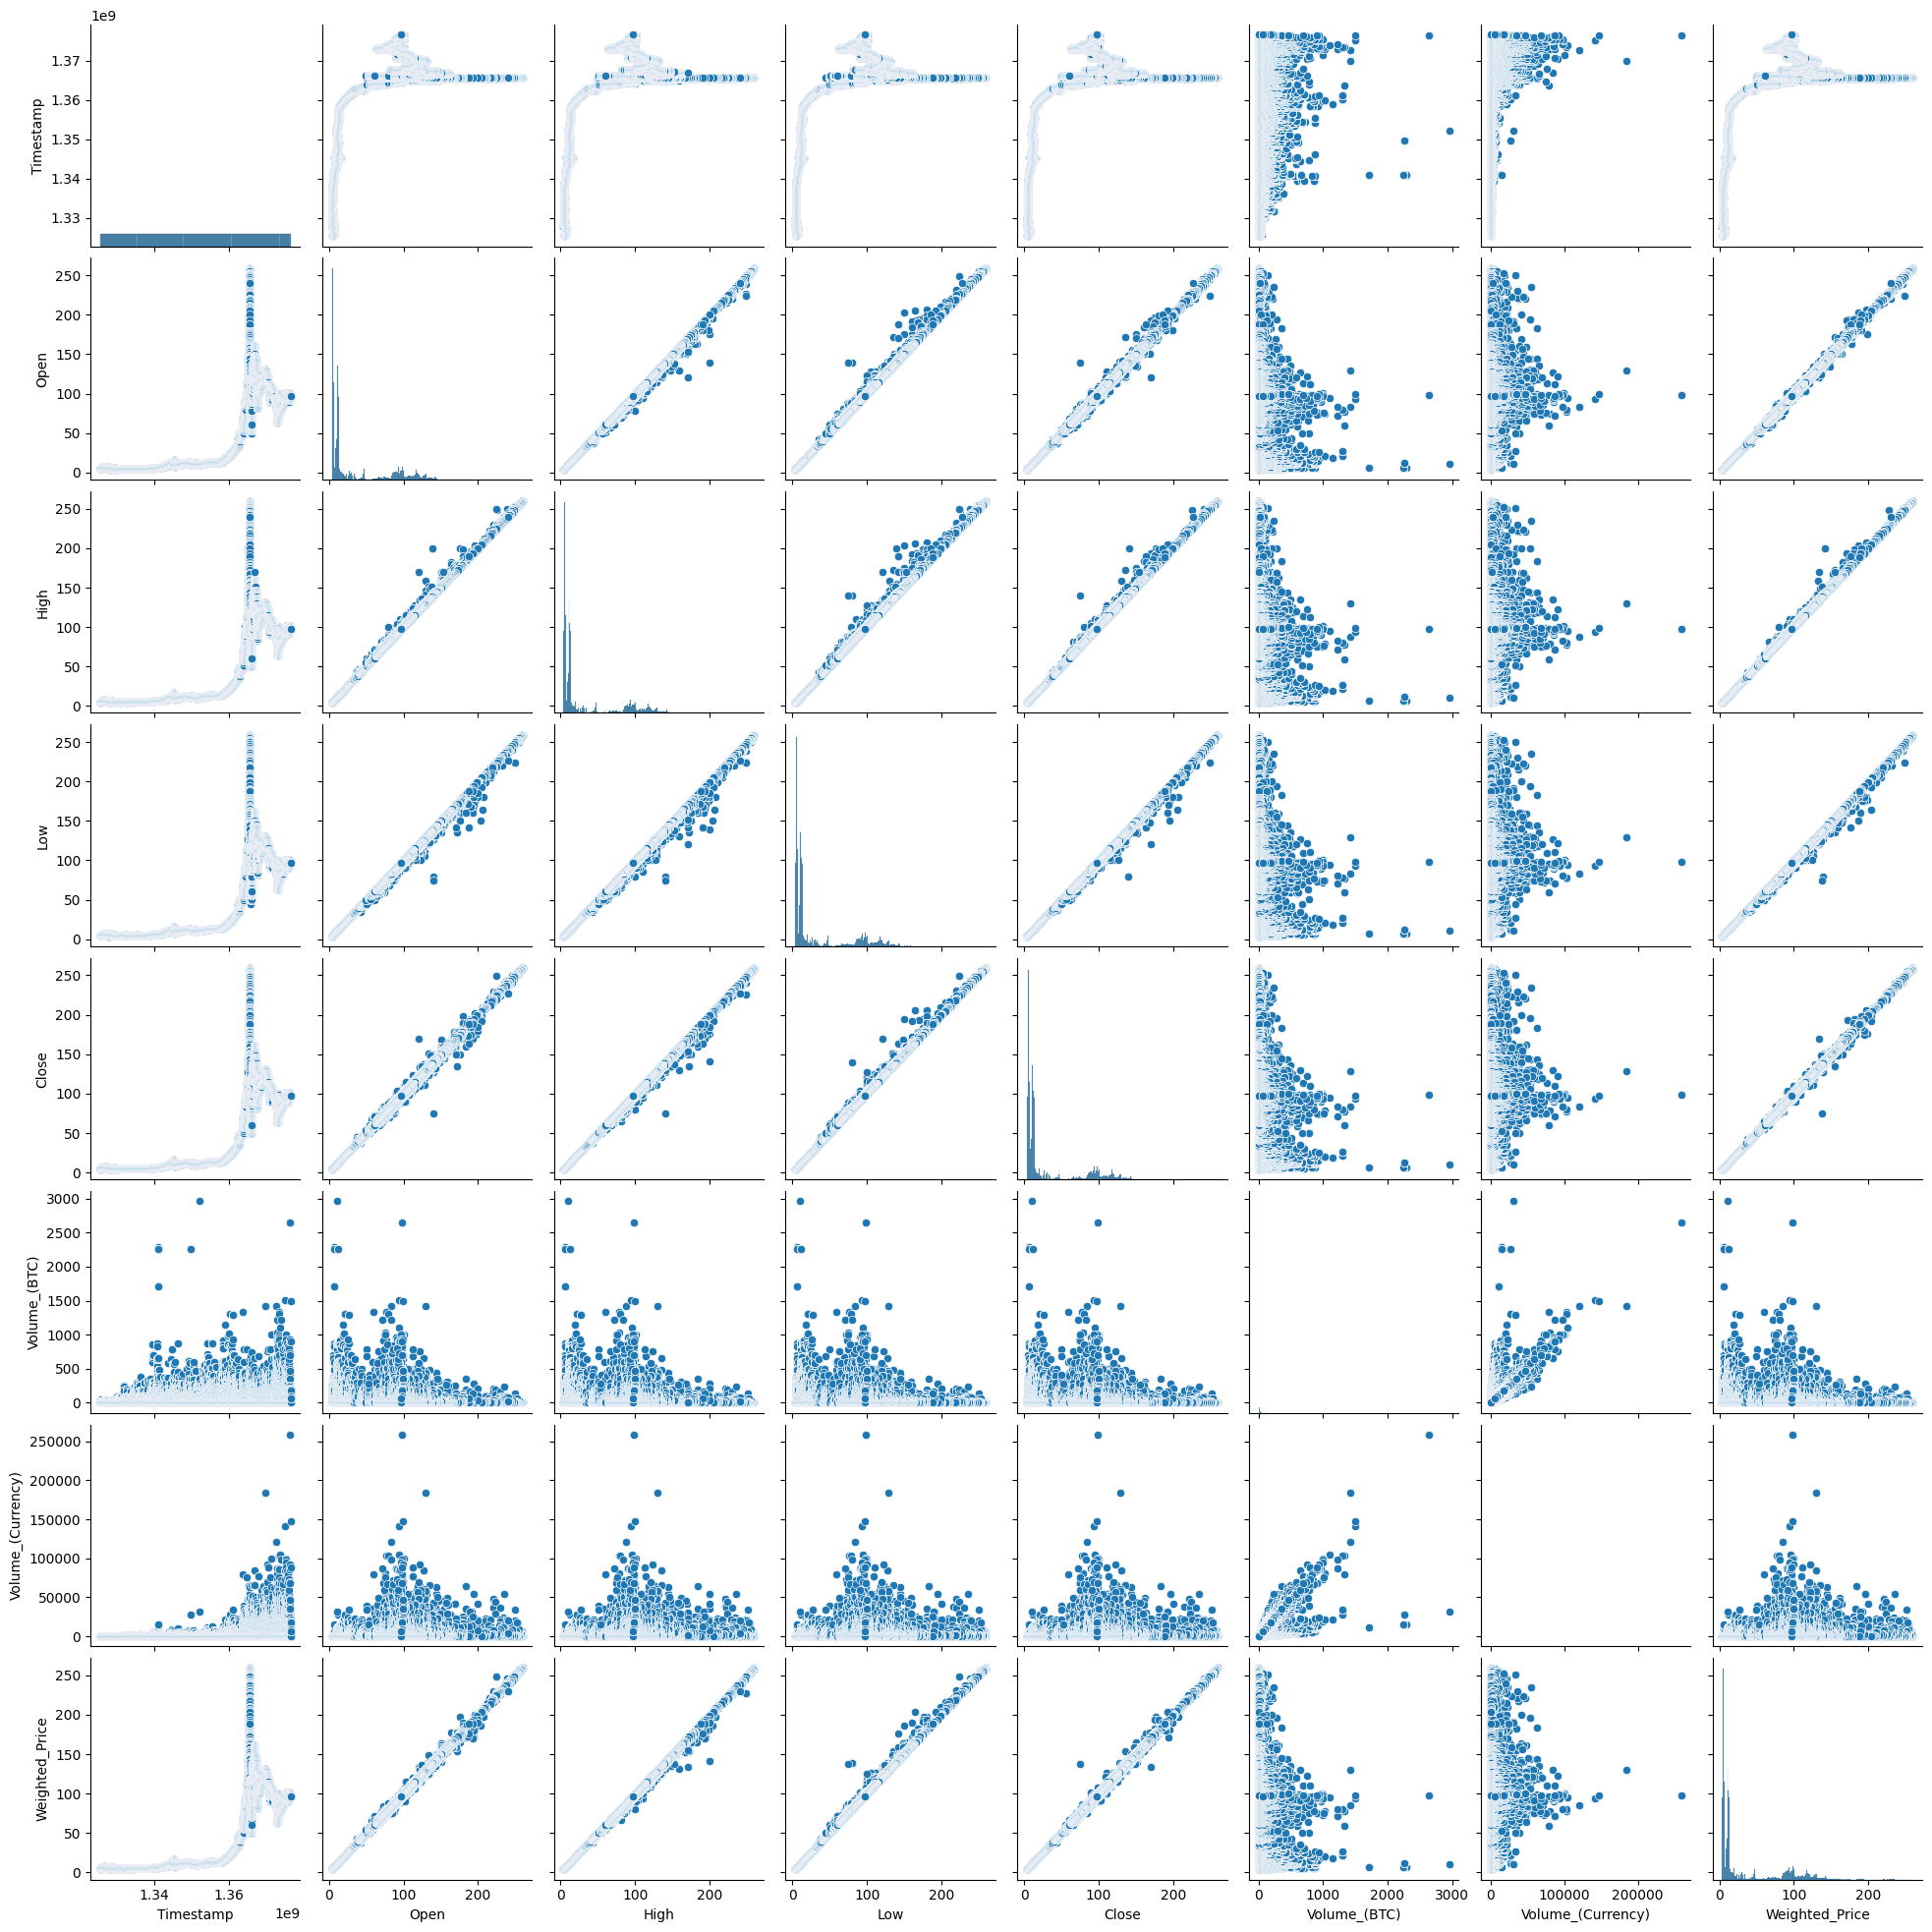

In [ ]:
sns.pairplot(df)

<ipython-input-16-e28f15073946>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weighted_Price'])


<Axes: xlabel='Weighted_Price', ylabel='Density'>

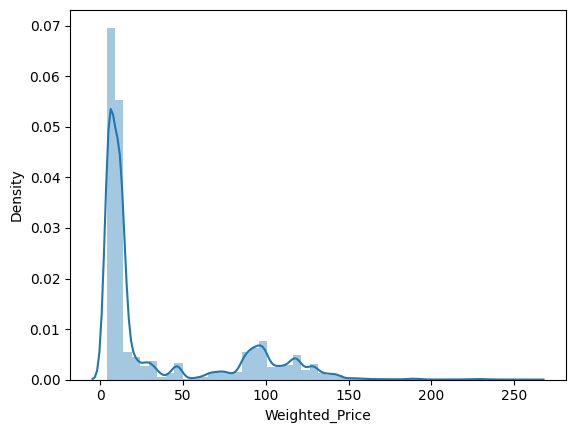

In [16]:
sns.distplot(df['Weighted_Price'])

In [26]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE', mae)
    print('MSE', mse)
    print('RMSE', rmse)
    print('R2 square', r2_square)
    print('------------------------------------------')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [28]:
print(model.intercept_)

8.161709191920863


In [29]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Open,-0.221946
High,1.631517
Low,1.687356
Volume_(BTC),-0.000686


In [30]:
pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

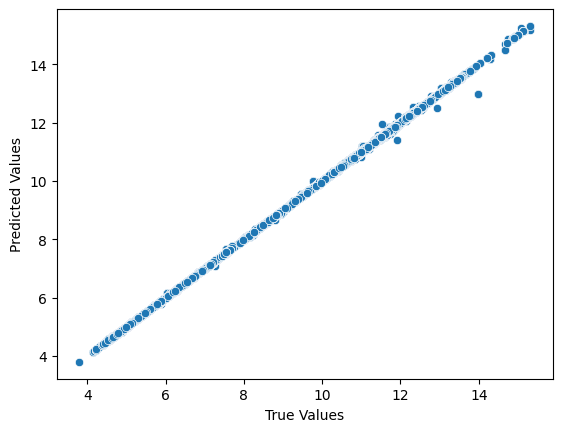

In [31]:
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [32]:
#regression_Evaluation_metrics
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [33]:
print("Test Set Evaluation:\n___________________")
print_evaluate(y_test, test_pred)

print("Train Set Evaluation:\n_____________________")
print_evaluate(y_train, train_pred)

Test Set Evaluation:
___________________
MAE 0.0014537004899642378
MSE 8.046891365898056e-05
RMSE 0.008970446681129127
R2 square 0.9999915782084191
------------------------------------------
Train Set Evaluation:
_____________________
MAE 0.0013934501078905496
MSE 5.130798574153904e-05
RMSE 0.0071629592866034805
R2 square 0.9999946501975873
------------------------------------------


In [34]:
results_df = pd.DataFrame(data=[['Linear regression', *evaluate(y_test, test_pred), cross_val(LinearRegression())]],
                         columns = ['Model', 'MAE', 'MSE','RMSE', 'R2 Square', 'Cross Validation'])

In [35]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear regression,0.001454,0.00008,0.00897,0.999992,0.614506


In [36]:
y=y.astype(np.uint8)
y
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada_clf=AdaBoostClassifier(n_estimators=25, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)

In [37]:
print("Accuracy for Bitcoin price Prediction", accuracy)

Accuracy for Bitcoin price Prediction 0.3543532302494553


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor

In [39]:
gbrt=GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
y_pred_trained=gbrt.predict(X_train)
y_pred_test=gbrt.predict(X_test)

In [41]:
train_rmse=mean_squared_error(y_train, y_pred_trained, squared=False)
test_rmse=mean_squared_error(y_test, y_pred_test, squared=False)

In [42]:
print("Train RMSE for Gradient_Boosting_Regressor:", train_rmse)
print("Test RMSE for Gradient_boosting_Regressor:", test_rmse)

Train RMSE for Gradient_Boosting_Regressor: 0.01232835276836923
Test RMSE for Gradient_boosting_Regressor: 0.012777133634126749


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns

In [44]:
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00     17149
           5       1.00      1.00      1.00     24058
           6       1.00      1.00      1.00     12764
           7       1.00      1.00      1.00      3308
           8       1.00      1.00      1.00      3704
           9       1.00      1.00      1.00      2545
          10       1.00      1.00      1.00     12509
          11       1.00      1.00      1.00     12579
          12       1.00      1.00      1.00      8944
          13       1.00      1.00      1.00      6465
          14       1.00      1.00      1.00        96
          15       1.00      1.00      1.00        65

    accuracy                           1.00    104187
   macro avg       1.00      1.00      1.00    104187
weighted avg       1.00      1.00      1.00    104187



In [45]:
from sklearn.linear_model import LogisticRegression
import time
t0=time.time()
clf_logreg=LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [46]:
y_pred=clf_logreg.predict(X_test)
score1=accuracy_score(y_test,y_pred)

In [47]:
print('accuracy using logistic regression:',score1)
print('time taken by logistic regression:',time.time()-t0)

accuracy using logistic regression: 0.5970994461881041
time taken by logistic regression: 30.27076292037964


In [48]:
#Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
t0=time.time()

In [49]:
clf_rf=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred=clf_rf.predict(X_test)
score2=accuracy_score(y_test,y_pred)
print('Accuracy by Random Forest Classifier:',score2)
print('Time Taken by Random Forest Classifier:',time.time()-t0)

Accuracy by Random Forest Classifier: 0.8800234194285276
Time Taken by Random Forest Classifier: 24.08503484725952


In [50]:
#Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
t0=time.time()
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred=clf_dt.predict(X_test)
score3=accuracy_score(y_test,y_pred)

In [52]:
print('Accuracy by Decision Tree Classifier:',score3)
print('Time Taken by classifier:',time.time()-t0)

Accuracy by Decision Tree Classifier: 0.9999616074942171
Time Taken by classifier: 534.8197813034058


In [51]:
#SVM
from sklearn import svm
t0=time.time()
clf_svc=svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_pred=clf_svc.predict(X_test)
score4=accuracy_score(y_test,y_pred)

In [53]:
print('Accuracy By Support Vector Machine:',score4)
print('Time taken By Support Vector Machine:',time.time()-t0)

Accuracy By Support Vector Machine: 0.9940971522358836
Time taken By Support Vector Machine: 540.2756943702698


In [55]:

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [56]:
import numpy as np
model = Sequential()
import matplotlib.pyplot as plt
score = np.float64(0.85)
#check_type_of_variable
if isinstance(score, dict):
    names = list(score.keys())
    values = list(score.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Score of Different Classifiers')
    plt.ylim(0, 1.0)  # Set y-axis limit to 0-1 for accuracy scores
    plt.show()
else:
    print("The variable is not a dictionary.")

The variable is not a dictionary.


In [57]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))  # Adjust input shape based on your data
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [58]:
import numpy as np

X_train_array = X_train.values
X_test_array = X_test.values

X_train_lstm = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_lstm = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))



In [62]:
import numpy as np

# Assuming you have already loaded your data into X_train_lstm and X_test_lstm

# Check the shapes of your input data
print("X_train_lstm shape before reshaping:", X_train_lstm.shape)
print("X_test_lstm shape before reshaping:", X_test_lstm.shape)

# Check the sizes of your input data
print("Size of X_train_lstm before reshaping:", X_train_lstm.size)
print("Size of X_test_lstm before reshaping:", X_test_lstm.size)

# Check for any missing values or NaNs
print("NaNs in X_train_lstm:", np.isnan(X_train_lstm).any())
print("NaNs in X_test_lstm:", np.isnan(X_test_lstm).any())

# Ensure that X_train_lstm and X_test_lstm have the same length as y_train and y_test respectively
print("Length of X_train_lstm:", len(X_train_lstm))
print("Length of X_test_lstm:", len(X_test_lstm))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

# If everything looks good, reshape the input data
try:
    X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, 1)
    X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, 1)
    print("X_train_lstm shape after reshaping:", X_train_lstm.shape)
    print("X_test_lstm shape after reshaping:", X_test_lstm.shape)
except ValueError as e:
    print("Error during reshaping:", e)


X_train_lstm shape before reshaping: (416746, 4, 1)
X_test_lstm shape before reshaping: (104187, 4, 1)
Size of X_train_lstm before reshaping: 1666984
Size of X_test_lstm before reshaping: 416748
NaNs in X_train_lstm: False
NaNs in X_test_lstm: False
Length of X_train_lstm: 416746
Length of X_test_lstm: 104187
Length of y_train: 416746
Length of y_test: 104187
Error during reshaping: cannot reshape array of size 1666984 into shape (416746,1,1)


In [39]:
#artificial_neural_network
model= Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12530/12530 [==============================] - 39s 3ms/step - loss: -88201888.0000 - accuracy: 0.0000e+00 - val_loss: -301476320.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
12530/12530 [==============================] - 35s 3ms/step - loss: -908044992.0000 - accuracy: 0.0000e+00 - val_loss: -1759735296.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
12530/12530 [==============================] - 35s 3ms/step - loss: -3291303168.0000 - accuracy: 0.0000e+00 - val_loss: -5149228032.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
12530/12530 [==============================] - 34s 3ms/step - loss: -7987906560.0000 - accuracy: 0.0000e+00 - val_loss: -11213506560.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
12530/12530 [==============================] - 35s 3ms/step - loss: -15777304576.0000 - accuracy: 0.0000e+00 - val_loss: -20703064064.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
12530/12530 [==============================] - 41s 3ms/step - loss: -27353741312.0000 - accuracy: 0.0000e+00 - val_

In [43]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

3916/3916 [==============================] - 7s 2ms/step
Accuracy on the test set: 0.0


In [44]:
data=pd.DataFrame({'Classifier_Name':{1:'Logistic_Regression',2:'Random_forest',3:'Decision_Tree',4:'LSTM',5:'Artificial_Neural_Network'},'Accuracy':{1:[score1],2:[score2],3:[score3],4:[score_lstm],5:[accuracy]}})
data

,Classifier_Name,Accuracy
1,Logistic_Regression,[0.29683634216028987]
2,Random_forest,[0.7508898785295854]
3,Decision_Tree,[0.9998244185860907]
4,LSTM,[0.0]
5,Artificial_Neural_Network,[0.0]


Epoch 1/10
15663/15663 [==============================] - 40s 3ms/step - loss: -656872177664.0000 - accuracy: 0.0000e+00
Epoch 2/10
15663/15663 [==============================] - 39s 3ms/step - loss: -807719665664.0000 - accuracy: 0.0000e+00
Epoch 3/10
15663/15663 [==============================] - 38s 2ms/step - loss: -980063485952.0000 - accuracy: 0.0000e+00
Epoch 4/10
15663/15663 [==============================] - 38s 2ms/step - loss: -1175312269312.0000 - accuracy: 0.0000e+00
Epoch 5/10
15663/15663 [==============================] - 36s 2ms/step - loss: -1395062603776.0000 - accuracy: 0.0000e+00
Epoch 6/10
15663/15663 [==============================] - 39s 2ms/step - loss: -1640313126912.0000 - accuracy: 0.0000e+00
Epoch 7/10
15663/15663 [==============================] - 37s 2ms/step - loss: -1912765415424.0000 - accuracy: 0.0000e+00
Epoch 8/10
15663/15663 [==============================] - 36s 2ms/step - loss: -2213487837184.0000 - accuracy: 0.0000e+00
Epoch 9/10
15663/15663 [===

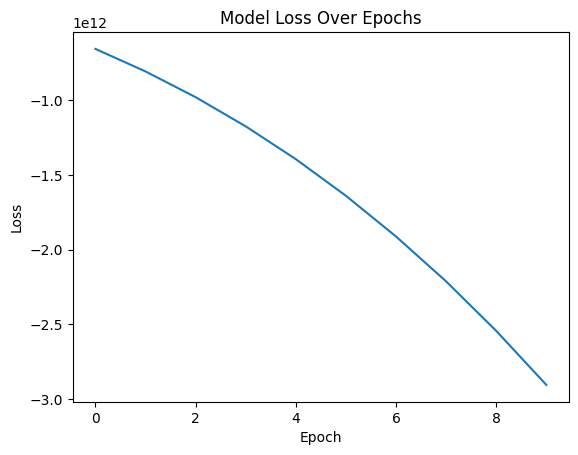

In [45]:
#for_lstm
history = model.fit(X_train_lstm, y_train, epochs=10, verbose=1)

# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [46]:
# Evaluate the model on the test set
predictions = model.predict(X_test_lstm)
score_lstm = accuracy_score(y_test, predictions.round())
print(f'Accuracy using LSTM: {score_lstm}')

3916/3916 [==============================] - 7s 2ms/step
Accuracy using LSTM: 0.0


In [47]:
#for_ANN_plot
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [48]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and record the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12530/12530 [==============================] - 65s 5ms/step - loss: -95524640.0000 - accuracy: 0.0000e+00 - val_loss: -329208640.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
12530/12530 [==============================] - 48s 4ms/step - loss: -996231680.0000 - accuracy: 0.0000e+00 - val_loss: -1927152256.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
12530/12530 [==============================] - 34s 3ms/step - loss: -3604835840.0000 - accuracy: 0.0000e+00 - val_loss: -5649186816.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
12530/12530 [==============================] - 35s 3ms/step - loss: -8766644224.0000 - accuracy: 0.0000e+00 - val_loss: -12313871360.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
12530/12530 [==============================] - 41s 3ms/step - loss: -17290162176.0000 - accuracy: 0.0000e+00 - val_loss: -22727866368.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
12530/12530 [==============================] - 36s 3ms/step - loss: -30042054656.0000 - accuracy: 0.0000e+00 - val_

In [50]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

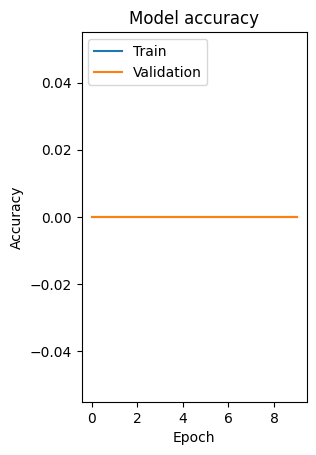

In [51]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

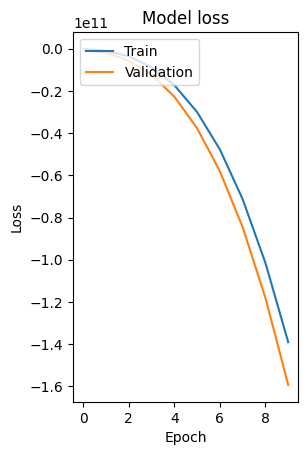

In [52]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [53]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy}")

3916/3916 [==============================] - 14s 3ms/step
Accuracy on the test set: 0.0


In [54]:
#k_n_n_classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
k = 3  # Choose the value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
y_pred = knn_classifier.predict(X_test)


In [56]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy1:.2f}')

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Confusion Matrix:
[[    2     0     0 ...     0     0     0]
 [    0 17127     7 ...     0     0     0]
 [    0     8 23982 ...     0     0     0]
 ...
 [    0     0     0 ...    75     2     0]
 [    0     0     0 ...     4    45     0]
 [    0     0     0 ...     0     1     2]]

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00     17134
           5       1.00      1.00      1.00     23993
           6       1.00      1.00      1.00     12751
           7       1.00      1.00      1.00      3286
           8       1.00      1.00      1.00      3618
           9       1.00      1.00      1.00      2484
          10       1.00      1.00      1.00     12587
          11       1.00      1.00      1.00     12614
          12       1.00      1.00      1.00      9019
          13       1.00      1.00      1.00     11409
          14       0.99      

In [58]:
data=pd.DataFrame({'Classifier_Name':{1:'Logistic_Regression',2:'Random_forest',3:'Decision_Tree',4:'LSTM',5:'Artificial_Neural_Network',6:'K_N_N_Classifier'},'Accuracy':{1:[score1],2:[score2],3:[score3],4:[score_lstm],5:[accuracy],6:[accuracy1]}})
data


,Classifier_Name,Accuracy
1,Logistic_Regression,[0.29683634216028987]
2,Random_forest,[0.7508898785295854]
3,Decision_Tree,[0.9998244185860907]
4,LSTM,[0.0]
5,Artificial_Neural_Network,[0.0]
6,K_N_N_Classifier,[0.9969033823365098]


In [60]:
d1 = pd.DataFrame({
    'Classifier_Name': {
        1: 'Logistic_Regression',
        2: 'Random_forest',
        3: 'Decision_Tree',
        #4: 'Support_Vector_Machine',
        5: 'LSTM',
        6: 'Artificial_Neural_Network',
        7: 'K_N_N_Classifier'
    },
    'Accuracy': {
        1: [score1],
        2: [score2],
        3: [score3],
        #4: [score4],
        5: [score_lstm],
        6: [accuracy],
        7: [accuracy1]
    }
})

In [61]:
# maximum accuracy and its corresponding classifier
max_accuracy_row = data.loc[data['Accuracy'].apply(lambda x: max(x)).idxmax()]

# Print the results
print(f"The maximum accuracy is {max_accuracy_row['Accuracy'][0]} achieved by {max_accuracy_row['Classifier_Name']}.")

The maximum accuracy is 0.9998244185860907 achieved by Decision_Tree.


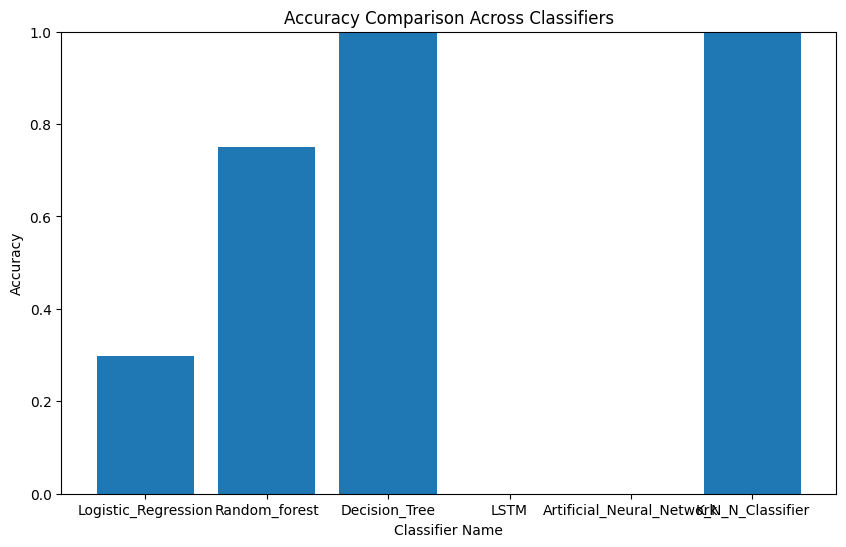

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(data['Classifier_Name'], data['Accuracy'].apply(lambda x: max(x)))
plt.xlabel('Classifier Name')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Classifiers')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()

In [66]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Main_by_LSTM
data = df.filter(['Close'])
dataset = data['Close'].values

# Reshape the dataset into a 2D array with a single column
dataset = dataset.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#make_predictions
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [ ]:
predictions = model.predict(x_test

predictions = scaler.inverse_transform(predictions))

In [ ]:
#Visualising_result
plt.figure(figsize=(16,8))

plt.title('Model')

plt.xlabel('Date', fontsize=18)

plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(df['Close'])

plt.plot(predictions['Prediction'])

plt.legend(['Actual', 'Predicted'], loc='lower right')

plt.show()

In [75]:
#Applying_Arima_Model
print('Summary Statistics:')
print(df.describe())

Summary Statistics:
          Timestamp           Open           High            Low  \
count  6.264890e+05  626489.000000  626489.000000  626489.000000   
mean   1.344113e+09      10.539495      10.542114      10.536215   
std    1.085112e+07       7.023613       7.025912       7.022329   
min    1.325318e+09       3.800000       3.800000       3.800000   
25%    1.334715e+09       5.220000       5.220000       5.210000   
50%    1.344113e+09       9.810000       9.810000       9.810000   
75%    1.353510e+09      12.350000      12.350000      12.350000   
max    1.362907e+09      49.170000      49.170000      49.120000   

               Close   Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  626489.000000  626489.000000      626489.000000   626489.000000  
mean       10.538792      16.372857         177.708828       10.539106  
std         7.024593      42.133980         582.141352        7.024193  
min         3.800000       0.000000           0.000000        3.800000  
25

In [76]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resample to daily frequency
df_daily = df.resample('D', on='Timestamp').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Timestamp').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()

In [77]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

In [78]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()

In [79]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


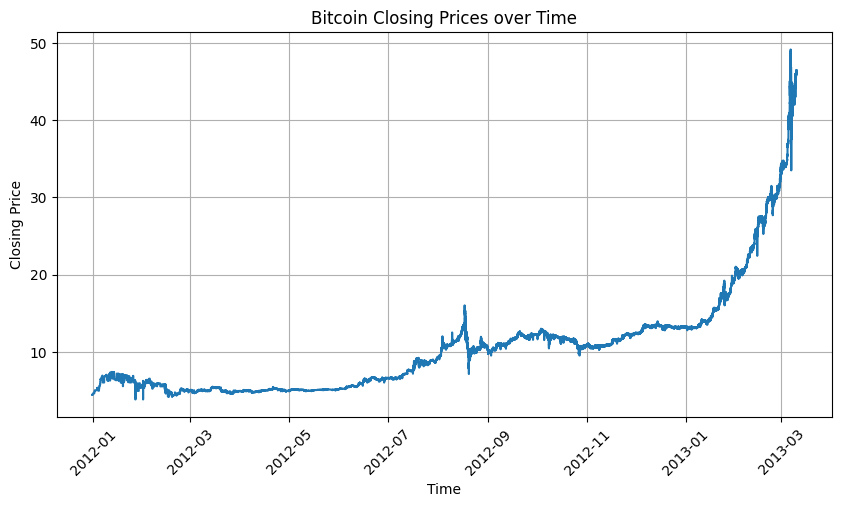

In [80]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

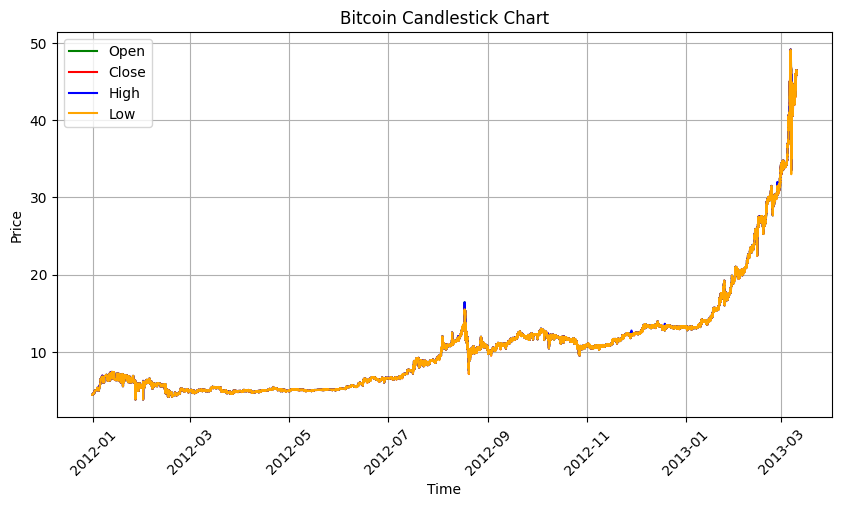

In [81]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

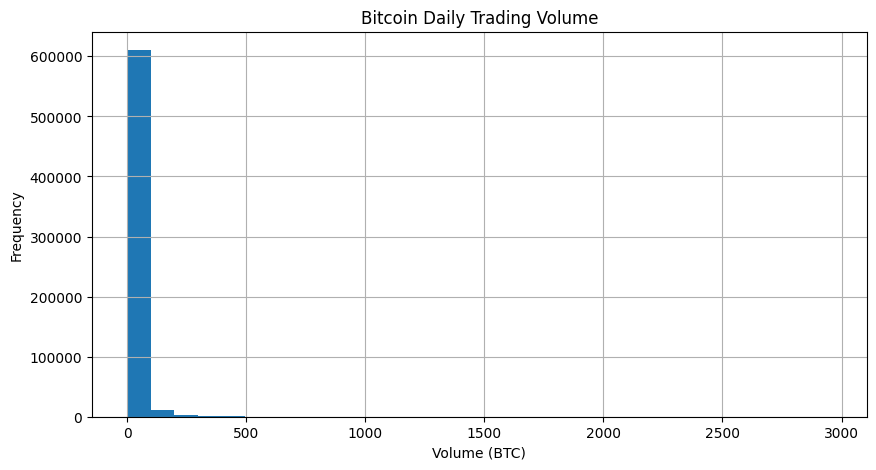

In [82]:
# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume_(BTC)'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

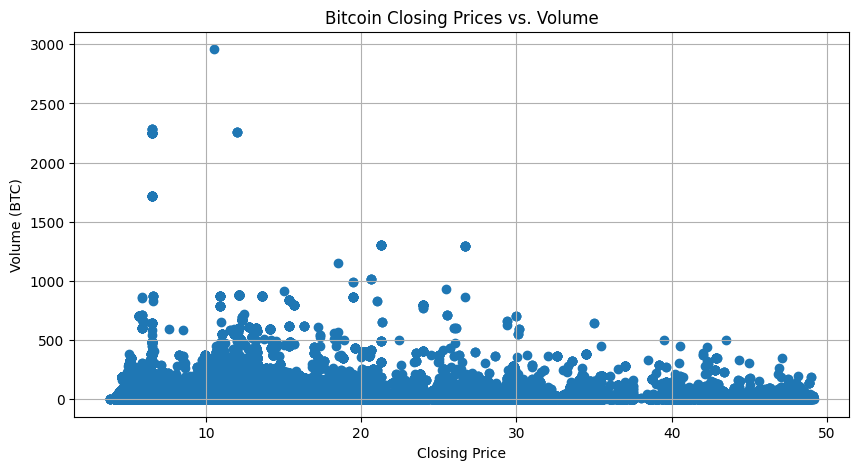

In [83]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume_(BTC)'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

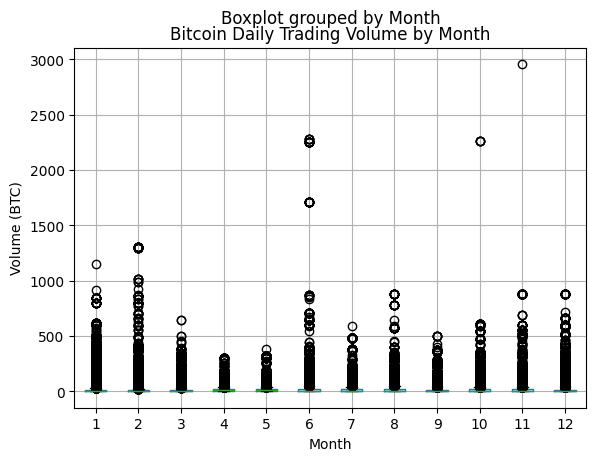

In [84]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume_(BTC)', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

In [85]:
#model_selection
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [86]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

In [87]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [88]:
# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [89]:
# SARIMA model
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [90]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [ ]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()